In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from iceflow_library import *
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from scipy.spatial import cKDTree

EPSG 4326 is standard lat-lon format
EPSG 3031 is Antarctic Polar Stereographic format (this is the format the iceflow data is in)

In [4]:
try:
    iceflow_data = iceflow_data_file_loader()
    print("The iceflow data pickle file was found and loaded.")
except FileNotFoundError:
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")

print(f"Iceflow data array layout is 0:x, 1:y, 2:v_x, 3:v_y, 4:latitude, 5:longitude")

The iceflow data pickle file was found and loaded.
Iceflow data array layout is 0:x, 1:y, 2:v_x, 3:v_y, 4:latitude, 5:longitude


In [7]:
x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]

In [10]:
print(f"Iceflow lat-lon for point (6000, 6000): ({iceflow_data[4][6000][1000]}, {iceflow_data[5][6000][1000]})")
print(latitude[6000][1000], longitude[6000][1000])
print(x[0])

Iceflow lat-lon for point (6000, 6000): (-68.5942716119921, 272.4366475685123)
-68.5942716119921 272.4366475685123
-2800000.0


In [86]:
i_x = np.random.randint(0, iceflow_data[0].size)
i_y = np.random.randint(0, iceflow_data[1].size)
x, y = iceflow_data[0][i_x], iceflow_data[1][i_y]
print(f"data x-y: \t\t\t{x, y}")
print(f"data lat-lon: \t\t{iceflow_data[4][i_x][i_y], iceflow_data[5][i_x][i_y]}")
point = xy_to_lonlat(x, y) 
print(f"converted lat-lon: \t{point}")

lat, lon = xy_to_lonlat(x, y)
print(f"converted x-y: \t\t{lonlat_to_xy(lat, lon)}")

data x-y: 			(-613000.0, 133300.0)
data lat-lon: 		(-84.23098815192614, 347.7317338333328)
converted lat-lon: 	(-84.23098750868813, 347.73173392836725)
converted x-y: 		(-613000, 133300)


In [87]:
print(f" finding the nearest x and y value to {x, y} with error")
x += np.random.uniform(-10, 10) * 0.1
y += np.random.uniform(-10, 10) * 0.1

x_index, y_index = find_nearest_x_and_y(x, y, iceflow_data)

print(f"nearest x and y: {iceflow_data[0][x_index], iceflow_data[1][y_index]}")
print(f"corresponding lat-lon: {iceflow_data[4][x_index][y_index], iceflow_data[5][x_index][y_index]}")
print("")

flow = flow_at_lat_lon(iceflow_data[4][x_index][y_index], iceflow_data[5][x_index][y_index], iceflow_data)
print(f"flow at lat-lon: {flow}")
print(flow[0], flow[1])
print("")

# print the complete ice flow data for (-660700.0, 77950.0)
print(f"x-y: ({x}, {y})")
print(f"nearest x and y: {iceflow_data[0][x_index], iceflow_data[1][y_index]}")
print(x_index, y_index)
print(iceflow_data[4][x_index][y_index])
print(f"corresponding lat-lon: {iceflow_data[4][x_index][y_index], iceflow_data[5][x_index][y_index]}")
# print(f"corresponding lat-lon: {iceflow_data[4][-660700.0, ][77950.0], iceflow_data[5][x][y]}")
print(f"flow at lat-lon: {iceflow_data[2][x_index][y_index], iceflow_data[3][x_index][y_index]}")

 finding the nearest x and y value to (-613000.0, 133300.0) with error
nearest x and y: (-613000.0, 133300.0)
corresponding lat-lon: (-84.23098815192614, 347.7317338333328)

x-y: (-612999, 133299), lat-lon: (-84.23098815192614, 347.7317338333328)
nearest x and y: (-613000.0, 133300.0)
flow at lat-lon: (0.46252126, 4.7683406)
0.46252126 4.7683406

x-y: (-613000.2415696362, 133300.18362549605)
nearest x and y: (-613000.0, 133300.0)
4860 5926
-84.23098815192614
corresponding lat-lon: (-84.23098815192614, 347.7317338333328)
flow at lat-lon: (0.46252126, 4.7683406)


In [88]:
# unmasked_x_index, unmasked_y_index, x_diff, y_diff = find_nearest_unmasked_x_and_y(x, y, iceflow_data)
unmasked_x_index, unmasked_y_index = find_nearest_unmasked_x_and_y(x, y, iceflow_data)
print(f"nearest unmasked x and y: {iceflow_data[0][unmasked_x_index], iceflow_data[1][unmasked_y_index]}")

nearest unmasked x and y: (-613000.0, 133300.0)


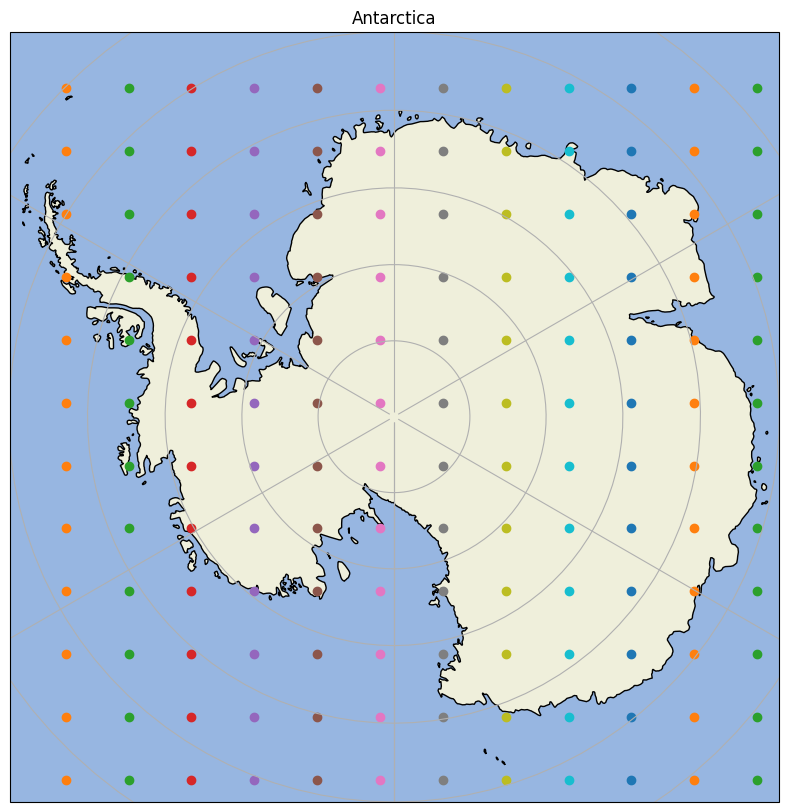

In [202]:


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines()
ax.set_title('Antarctica')
ax.plot(iceflow_data[5][::1000,::1000], iceflow_data[4][::1000,::1000], 'o', transform=ccrs.PlateCarree())
plt.show()